In [ ]:
import pandas as pd
import numpy as np


In [28]:
df = pd.read_csv("checkouts-by-title.csv")
df.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2006,6,1,McGraw-Hill's dictionary of American slang and...,"Spears, Richard A.",English language United States Slang Dictionar...,"McGraw-Hill,",c2006.
1,Physical,Horizon,BOOK,2006,6,1,"Emma, Lady Hamilton / Flora Fraser.","Fraser, Flora","Hamilton Emma Lady 1761 1815, Nelson Horatio N...","Knopf : Distributed by Random House,","1987, c1986."
2,Physical,Horizon,BOOK,2006,6,2,Red midnight,NaN,"Survival Fiction, Emigration and immigration F...",NaN,NaN
3,Physical,Horizon,BOOK,2006,6,1,Just the financial facts how to identify nugge...,NaN,Investments Information services,NaN,NaN
4,Physical,Horizon,SOUNDCASS,2006,6,3,single shard,NaN,"Korea Fiction, Pottery Fiction",NaN,NaN


In [ ]:

YEAR_CUTOFF = 2017

for col in ["CheckoutYear", "CheckoutMonth", "Checkouts"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

if "CheckoutYear" not in df.columns:
    raise ValueError("CheckoutYear column not found.")

before_n = len(df)
df = df[df["CheckoutYear"].notna()]
df = df[df["CheckoutYear"] <= YEAR_CUTOFF]

after_n = len(df)

print(f"Rows before filter: {before_n:,}")
print(f"Rows after  filter (<= {YEAR_CUTOFF}): {after_n:,}")
print("Years kept:", sorted(df["CheckoutYear"].dropna().unique())[:10], "...")

if "PublicationYear" in df.columns:
    df["PublicationYear_clean"] = (
        df["PublicationYear"].astype(str)
        .str.extract(r"(\d{4})", expand=False)
    )
    df["PublicationYear_clean"] = pd.to_numeric(df["PublicationYear_clean"], errors="coerce")

    cur_year = pd.Timestamp.today().year
    bad_year_mask = (df["PublicationYear_clean"] < 1450) | (df["PublicationYear_clean"] > cur_year)
    df.loc[bad_year_mask, "PublicationYear_clean"] = np.nan

df.head()


Rows before filter: 34,892,623
Rows after  filter (<= 2017): 29,996,537
Years kept: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014)] ...


,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,PublicationYear_clean
0,Physical,Horizon,BOOK,2006,6,1,McGraw-Hill's dictionary of American slang and...,"Spears, Richard A.",English language United States Slang Dictionar...,"McGraw-Hill,",c2006.,2006.0
1,Physical,Horizon,BOOK,2006,6,1,"Emma, Lady Hamilton / Flora Fraser.","Fraser, Flora","Hamilton Emma Lady 1761 1815, Nelson Horatio N...","Knopf : Distributed by Random House,","1987, c1986.",1987.0
2,Physical,Horizon,BOOK,2006,6,2,Red midnight,NaN,"Survival Fiction, Emigration and immigration F...",NaN,NaN,NaN
3,Physical,Horizon,BOOK,2006,6,1,Just the financial facts how to identify nugge...,NaN,Investments Information services,NaN,NaN,NaN
4,Physical,Horizon,SOUNDCASS,2006,6,3,single shard,NaN,"Korea Fiction, Pottery Fiction",NaN,NaN,NaN


In [ ]:
def numeric_summary(s: pd.Series) -> pd.DataFrame:
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return pd.DataFrame({"value": [np.nan]}, index=["empty"])

    mode_vals = s.mode()
    mode_val = mode_vals.iloc[0] if len(mode_vals) else np.nan

    out = {
        "count": s.size,
        "mean": s.mean(),
        "median": s.median(),
        "mode": mode_val,
        "min": s.min(),
        "Q1 (25%)": s.quantile(0.25),
        "Q2 (50%)": s.quantile(0.50),
        "Q3 (75%)": s.quantile(0.75),
        "max": s.max(),
        "range": s.max() - s.min(),
        "variance": s.var(ddof=1),
        "std_dev": s.std(ddof=1),
        "p05": s.quantile(0.05),
        "p95": s.quantile(0.95),
        "IQR": s.quantile(0.75) - s.quantile(0.25),
    }
    return pd.DataFrame(out, index=["value"]).T

main_numeric_cols = [c for c in ["Checkouts", "CheckoutYear", "CheckoutMonth", "PublicationYear_clean"] if c in df.columns]

for c in main_numeric_cols:
    print(f"\n=== {c} (<= {YEAR_CUTOFF}) ===")
    display(numeric_summary(df[c]))



=== Checkouts (<= 2017) ===


,value
count,2.999654e+07
mean,3.524240e+00
median,2.000000e+00
mode,1.000000e+00
min,1.000000e+00
Q1 (25%),1.000000e+00
Q2 (50%),2.000000e+00
Q3 (75%),3.000000e+00
max,9.880000e+02
range,9.870000e+02



=== CheckoutYear (<= 2017) ===


,value
count,2.999654e+07
mean,2.011548e+03
median,2.012000e+03
mode,2.014000e+03
min,2.005000e+03
Q1 (25%),2.008000e+03
Q2 (50%),2.012000e+03
Q3 (75%),2.015000e+03
max,2.017000e+03
range,1.200000e+01



=== CheckoutMonth (<= 2017) ===


,value
count,2.999654e+07
mean,6.538762e+00
median,7.000000e+00
mode,9.000000e+00
min,1.000000e+00
Q1 (25%),4.000000e+00
Q2 (50%),7.000000e+00
Q3 (75%),9.000000e+00
max,1.200000e+01
range,1.100000e+01



=== PublicationYear_clean (<= 2017) ===


,value
count,2.018132e+07
mean,2.006043e+03
median,2.008000e+03
mode,2.011000e+03
min,1.730000e+03
Q1 (25%),2.004000e+03
Q2 (50%),2.008000e+03
Q3 (75%),2.012000e+03
max,2.022000e+03
range,2.920000e+02


In [ ]:
def group_summary(df, group_col, value_col="Checkouts", top_n=10):
    tmp = df[[group_col, value_col]].dropna()

    top_groups = tmp[group_col].value_counts().head(top_n).index
    tmp = tmp[tmp[group_col].isin(top_groups)]

    def q(x, p): 
        return x.quantile(p)

    summary = tmp.groupby(group_col)[value_col].agg(
        count="count",
        mean="mean",
        median="median",
        std="std",
        min="min",
        q1=lambda x: q(x, 0.25),
        q3=lambda x: q(x, 0.75),
        p95=lambda x: q(x, 0.95),
        max="max"
    ).sort_values("mean", ascending=False)

    summary["IQR"] = summary["q3"] - summary["q1"]
    return summary

for g in ["MaterialType", "UsageClass", "CheckoutType"]:
    if g in df.columns and "Checkouts" in df.columns:
        print(f"\n=== Checkouts by {g} (top 10) | <= {YEAR_CUTOFF} ===")
        display(group_summary(df, g, "Checkouts", top_n=10))



=== Checkouts by MaterialType (top 10) | <= 2017 ===


,count,mean,median,std,min,q1,q3,p95,max,IQR
MaterialType,,,,,,,,,,
VIDEODISC,2607359,10.442109,5.0,21.206110,1,3.0,11.0,31.0,622,8.0
SOUNDDISC,3613993,3.667724,2.0,4.914607,1,1.0,4.0,11.0,345,3.0
VIDEOCASS,506518,3.007702,2.0,3.516234,1,1.0,4.0,9.0,149,3.0
BOOK,17364779,2.903618,1.0,5.034575,1,1.0,3.0,9.0,810,2.0
EBOOK,2872692,2.455453,1.0,5.067245,1,1.0,2.0,6.0,368,1.0
AUDIOBOOK,1195434,2.362036,1.0,3.643165,1,1.0,2.0,6.0,157,1.0
MIXED,134906,1.734148,1.0,10.260260,1,1.0,2.0,2.0,988,1.0
SOUNDCASS,202981,1.635281,1.0,1.143886,1,1.0,2.0,4.0,27,1.0
MUSIC,241755,1.386164,1.0,2.066634,1,1.0,1.0,3.0,126,0.0



=== Checkouts by UsageClass (top 10) | <= 2017 ===


,count,mean,median,std,min,q1,q3,p95,max,IQR
UsageClass,,,,,,,,,,
Physical,24701413,3.796194,2.0,8.670214,1,1.0,4.0,12.0,988,3.0
Digital,5295124,2.255588,1.0,4.859008,1,1.0,2.0,6.0,496,1.0



=== Checkouts by CheckoutType (top 10) | <= 2017 ===


,count,mean,median,std,min,q1,q3,p95,max,IQR
CheckoutType,,,,,,,,,,
Zinio,7612,38.430242,25.0,44.562216,1,11.0,52.0,106.0,496,41.0
Horizon,24701413,3.796194,2.0,8.670214,1,1.0,4.0,12.0,988,3.0
OverDrive,4132325,2.412563,1.0,4.660258,1,1.0,2.0,6.0,368,1.0
Hoopla,246521,1.847559,1.0,3.064271,1,1.0,2.0,5.0,243,1.0
Freegal,908666,1.349376,1.0,2.774144,1,1.0,1.0,2.0,317,0.0


/var/folders/dc/2mjh00k122q49kf6yz22nb7c0000gp/T/ipykernel_93674/428203237.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=groups, showfliers=True)


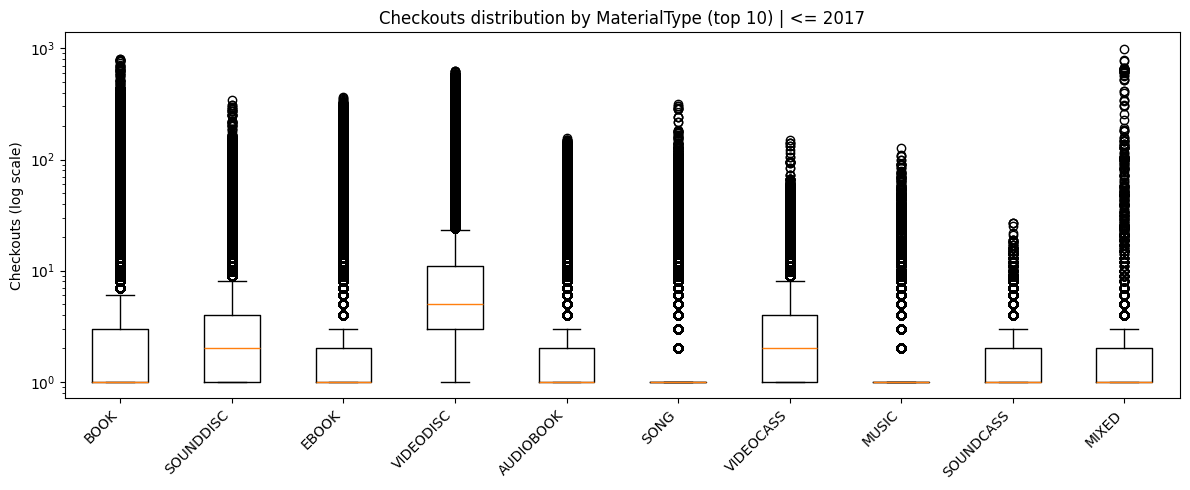

/var/folders/dc/2mjh00k122q49kf6yz22nb7c0000gp/T/ipykernel_93674/428203237.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=groups, showfliers=True)


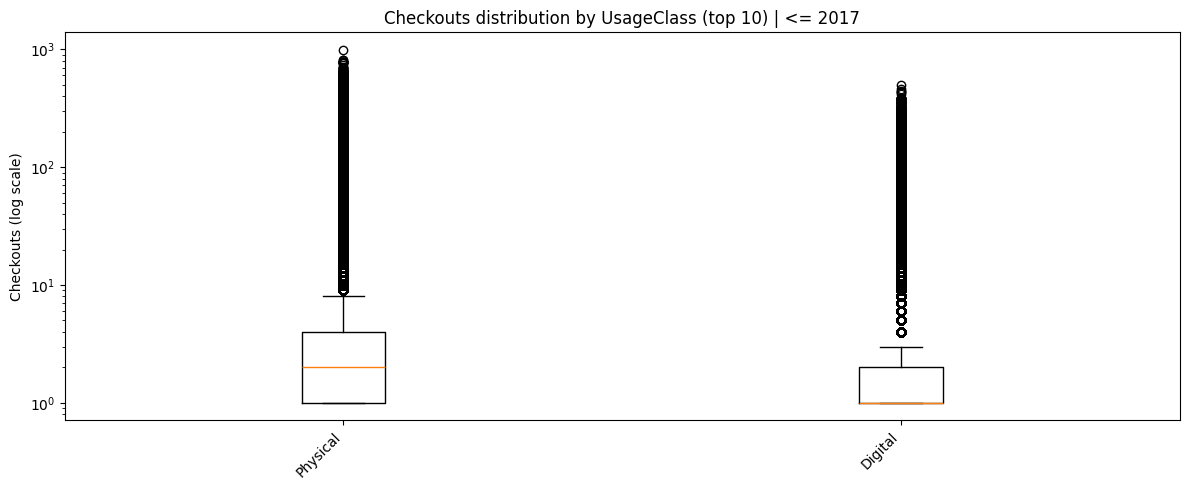

/var/folders/dc/2mjh00k122q49kf6yz22nb7c0000gp/T/ipykernel_93674/428203237.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=groups, showfliers=True)


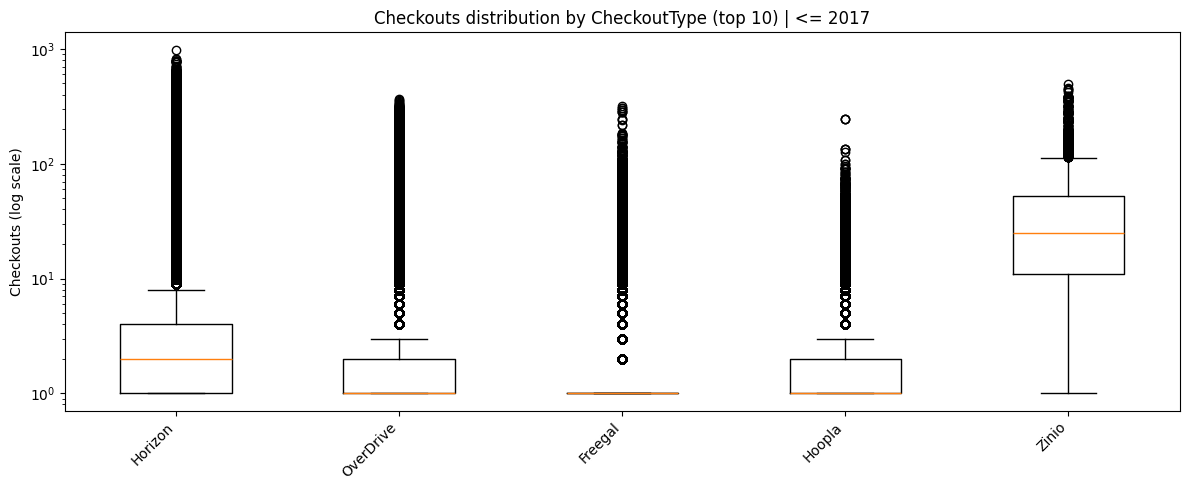

In [ ]:
import matplotlib.pyplot as plt

def boxplot_by_group(df, group_col, value_col="Checkouts", top_n=10, log_scale=True):
    tmp = df[[group_col, value_col]].dropna()
    top_groups = tmp[group_col].value_counts().head(top_n).index
    tmp = tmp[tmp[group_col].isin(top_groups)]

    groups = [g for g in top_groups if g in tmp[group_col].unique()]
    box_data = [tmp.loc[tmp[group_col] == g, value_col].values for g in groups]

    plt.figure(figsize=(12, 5))
    plt.boxplot(box_data, labels=groups, showfliers=True)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(value_col + (" (log scale)" if log_scale else ""))

    if log_scale:
        plt.yscale("log")

    plt.title(f"{value_col} distribution by {group_col} (top {top_n}) | <= {YEAR_CUTOFF}")
    plt.tight_layout()
    plt.show()

for g in ["MaterialType", "UsageClass", "CheckoutType"]:
    if g in df.columns and "Checkouts" in df.columns:
        boxplot_by_group(df, g, "Checkouts", top_n=10, log_scale=True)


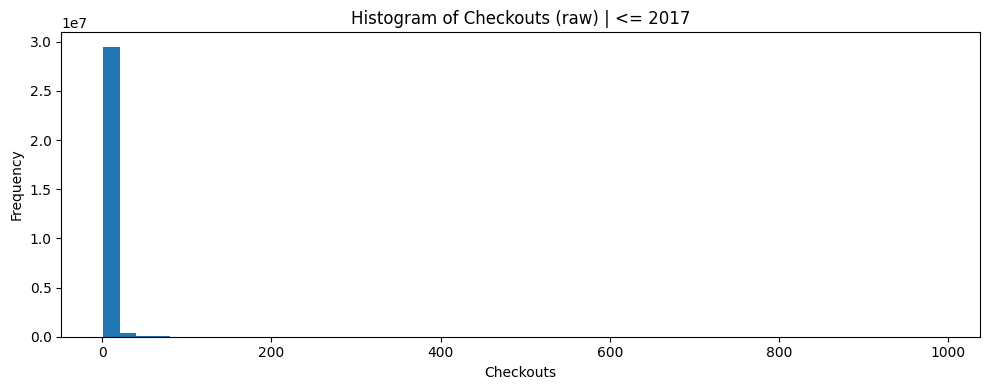

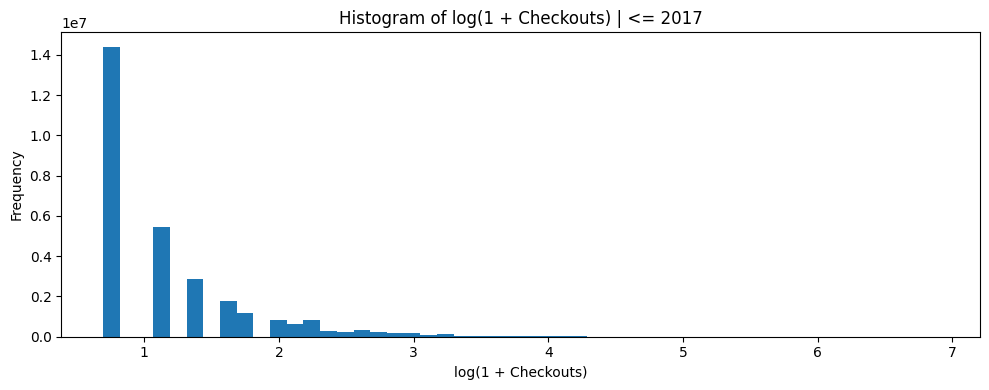

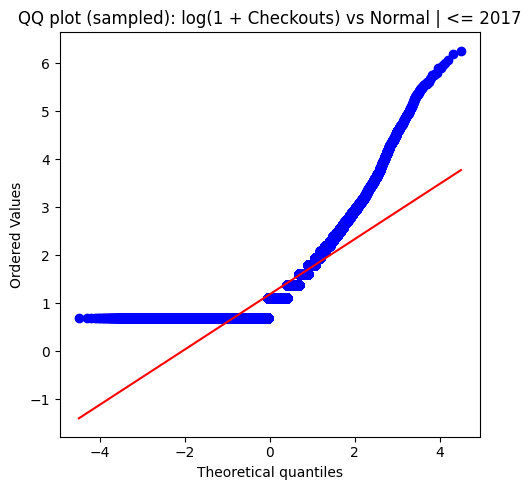

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = df["Checkouts"].dropna()
x = x[x >= 0]

plt.figure(figsize=(10,4))
plt.hist(x, bins=50)
plt.title(f"Histogram of Checkouts (raw) | <= {YEAR_CUTOFF}")
plt.xlabel("Checkouts")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

x_log = np.log1p(x)

plt.figure(figsize=(10,4))
plt.hist(x_log, bins=50)
plt.title(f"Histogram of log(1 + Checkouts) | <= {YEAR_CUTOFF}")
plt.xlabel("log(1 + Checkouts)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

qq_sample = x_log.sample(200_000, random_state=0) if len(x_log) > 200_000 else x_log
plt.figure(figsize=(5,5))
stats.probplot(qq_sample, dist="norm", plot=plt)
plt.title(f"QQ plot (sampled): log(1 + Checkouts) vs Normal | <= {YEAR_CUTOFF}")

plt.tight_layout()
plt.show()


Sample mean (mu): 3.5242
Sample variance (var): 66.4156
Overdispersion (var/mu): 18.8454

Poisson MLE: lambda = 3.5242
NegBin (MoM): n = 0.1975, p = 0.0531

Poisson logLik = -118231270.75, AIC = 236462543.50
NegBin logLik = -88126020.50, AIC = 176252045.01


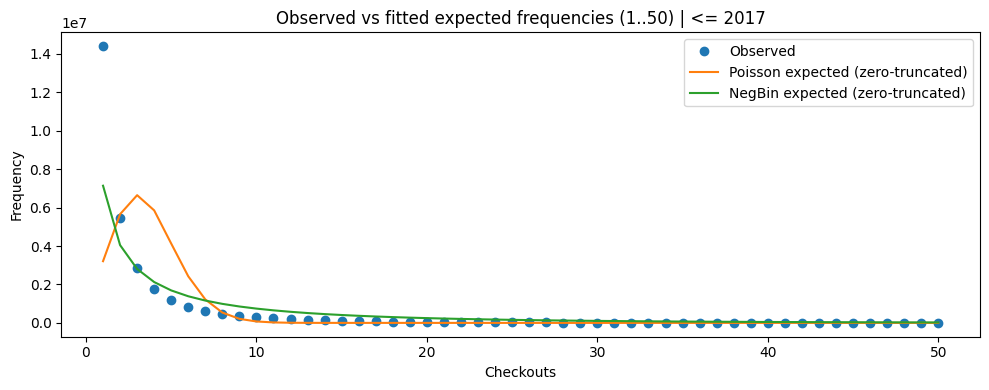

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, nbinom

x = df["Checkouts"].dropna().astype(int)
x = x[x >= 0]

mu = x.mean()
var = x.var(ddof=1)

print(f"Sample mean (mu): {mu:.4f}")
print(f"Sample variance (var): {var:.4f}")
print(f"Overdispersion (var/mu): {(var/mu if mu>0 else np.nan):.4f}")

lambda_hat = mu
print(f"\nPoisson MLE: lambda = {lambda_hat:.4f}")

use_nb = (var > mu and mu > 0)
if use_nb:
    p_hat = mu / var
    n_hat = (mu**2) / (var - mu)
    print(f"NegBin (MoM): n = {n_hat:.4f}, p = {p_hat:.4f}")
else:
    n_hat, p_hat = None, None
    print("NegBin MoM not valid because var <= mu (no overdispersion).")

ll_pois = poisson.logpmf(x, lambda_hat).sum()
aic_pois = 2*1 - 2*ll_pois
print(f"\nPoisson logLik = {ll_pois:.2f}, AIC = {aic_pois:.2f}")

if use_nb:
    ll_nb = nbinom.logpmf(x, n_hat, p_hat).sum()
    aic_nb = 2*2 - 2*ll_nb
    print(f"NegBin logLik = {ll_nb:.2f}, AIC = {aic_nb:.2f}")

counts = x.value_counts().sort_index()
max_k = 50

k = np.arange(1, max_k + 1)
obs = np.array([counts.get(i, 0) for i in k])

has_zero = counts.get(0, 0) > 0

plt.figure(figsize=(10,4))
plt.plot(k, obs, marker="o", linestyle="None", label="Observed")

if has_zero:
    exp_pois = poisson.pmf(k, lambda_hat) * len(x)
    plt.plot(k, exp_pois, label="Poisson expected")
else:
    pois_trunc = poisson.pmf(k, lambda_hat) / (1 - poisson.pmf(0, lambda_hat))
    exp_pois = pois_trunc * len(x)
    plt.plot(k, exp_pois, label="Poisson expected (zero-truncated)")

if use_nb:
    if has_zero:
        exp_nb = nbinom.pmf(k, n_hat, p_hat) * len(x)
        plt.plot(k, exp_nb, label="NegBin expected")
    else:
        nb0 = nbinom.pmf(0, n_hat, p_hat)
        nb_trunc = nbinom.pmf(k, n_hat, p_hat) / (1 - nb0)
        exp_nb = nb_trunc * len(x)
        plt.plot(k, exp_nb, label="NegBin expected (zero-truncated)")

plt.title(f"Observed vs fitted expected frequencies (1..50) | <= {YEAR_CUTOFF}")
plt.xlabel("Checkouts")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()
